TASK 2
Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
# import libraries
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
#load data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
target='CustomerID'

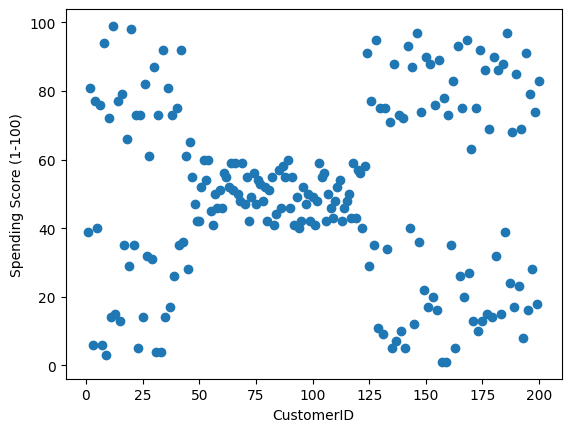

In [5]:
#visualize the data with Target variable with Spending Score
plt.scatter(df[target], df['Spending Score (1-100)'])
plt.xlabel(target)
plt.ylabel('Spending Score (1-100)')
plt.show()

In [6]:
# Using the elbow method to find the optimal number of clusters ling without scaling data
'''
sse=[]
X = df[[target, 'Spending Score (1-100)']]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)  
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
'''
      

"\nsse=[]\nX = df[[target, 'Spending Score (1-100)']]\nfor i in range(1, 11):\n    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)\n    kmeans.fit(X)  \n    sse.append(kmeans.inertia_)\nplt.plot(range(1, 11), sse)\nplt.title('The Elbow Method')\nplt.xlabel('Number of clusters')\nplt.ylabel('SSE')\nplt.show()\n"

In [7]:
# Fitting K-Means to the dataset without scaling data
'''
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans
'''


"\nkmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)\ny_kmeans = kmeans.fit_predict(X)\ndf['Cluster'] = y_kmeans\n"

In [8]:
# Visualising the clusters without scaling data
'''
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]
df5 = df[df.Cluster == 4]
plt.scatter(df1[target], df1['Spending Score (1-100)'], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(df2[target], df2['Spending Score (1-100)'], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(df3[target], df3['Spending Score (1-100)'], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(df4[target], df4['Spending Score (1-100)'], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(df5[target], df5['Spending Score (1-100)'], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', marker='*', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(target)
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
'''


"\ndf1 = df[df.Cluster == 0]\ndf2 = df[df.Cluster == 1]\ndf3 = df[df.Cluster == 2]\ndf4 = df[df.Cluster == 3]\ndf5 = df[df.Cluster == 4]\nplt.scatter(df1[target], df1['Spending Score (1-100)'], s = 10, c = 'red', label = 'Cluster 1')\nplt.scatter(df2[target], df2['Spending Score (1-100)'], s = 10, c = 'blue', label = 'Cluster 2')\nplt.scatter(df3[target], df3['Spending Score (1-100)'], s = 10, c = 'green', label = 'Cluster 3')\nplt.scatter(df4[target], df4['Spending Score (1-100)'], s = 10, c = 'cyan', label = 'Cluster 4')\nplt.scatter(df5[target], df5['Spending Score (1-100)'], s = 10, c = 'magenta', label = 'Cluster 5')\nplt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', marker='*', label = 'Centroids')\nplt.title('Clusters of customers')\nplt.xlabel(target)\nplt.ylabel('Spending Score (1-100)')\nplt.legend()\nplt.show()\n"

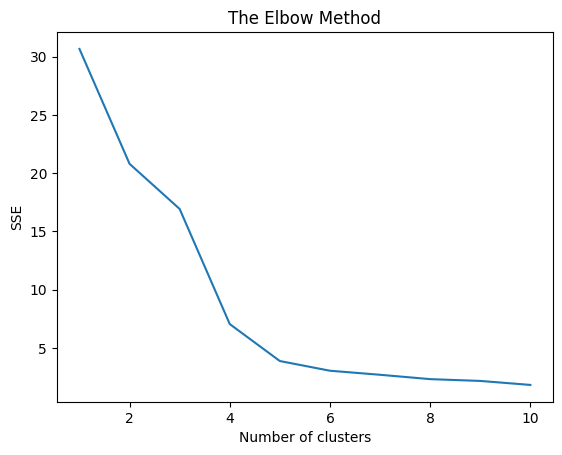

In [9]:
#Reapeat the process with using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[[target, 'Spending Score (1-100)']])
sse=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [10]:
df_scaled = pd.DataFrame(df_scaled, columns = [target, 'Spending Score (1-100)'])
df_scaled

,CustomerID,Spending Score (1-100)
0,0.000000,0.387755
1,0.005025,0.816327
2,0.010050,0.051020
3,0.015075,0.775510
4,0.020101,0.397959
...,...,...
195,0.979899,0.795918
196,0.984925,0.275510
197,0.989950,0.744898
198,0.994975,0.173469


In [11]:
# Fitting K-Means to the scaled dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_scaled)
df_scaled['Cluster'] = y_kmeans

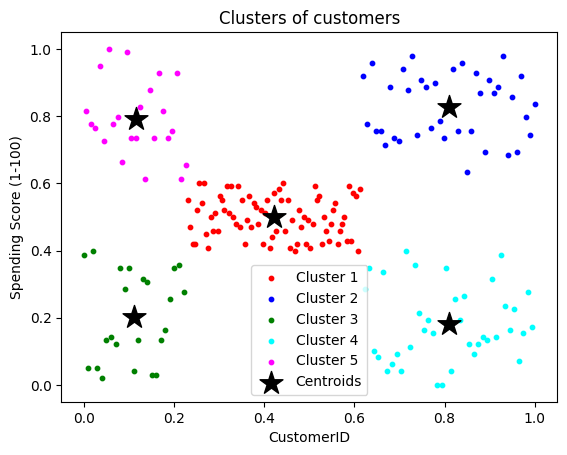

In [12]:
# Visualising the clusters
df1 = df_scaled[df_scaled.Cluster == 0]
df2 = df_scaled[df_scaled.Cluster == 1]
df3 = df_scaled[df_scaled.Cluster == 2]
df4 = df_scaled[df_scaled.Cluster == 3]
df5 = df_scaled[df_scaled.Cluster == 4]
plt.scatter(df1[target], df1['Spending Score (1-100)'], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(df2[target], df2['Spending Score (1-100)'], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(df3[target], df3['Spending Score (1-100)'], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(df4[target], df4['Spending Score (1-100)'], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(df5[target], df5['Spending Score (1-100)'], s = 10, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', marker='*', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(target)
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

